In [ ]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split
import numpy as np

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

In [ ]:
X, y = load_iris(return_X_y=True)
dsX = X[0:100,:2]
dsy = y[0:100]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dsX, dsy, test_size=0.8, random_state=0)

In [ ]:
clf = LogisticRegression(C=100000000000000,max_iter = 100000000,random_state=0).fit(X_train, y_train)

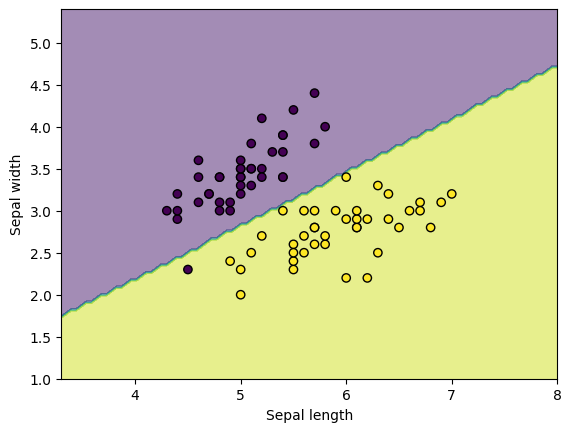

In [ ]:

disp = DecisionBoundaryDisplay.from_estimator(
...     clf, X_test, response_method="predict",
...     xlabel='Sepal length', ylabel='Sepal width',
...     alpha=0.5)
disp.ax_.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="k")
plt.show()


In [ ]:
w = clf.coef_[0]
print(w)
b= clf.intercept_[0]
print(-b/w[1])



[ 34.06458394 -53.59033928]
-0.356894942530588


In [ ]:
clf.score(X_test,y_test)

0.9875

In [ ]:
clf.score(X_train,y_train)

1.0

In [ ]:
dsX12 = X[50:150,:2]
dsy12 = y[50:150]
dsX02 = np.append(X[0:50,:2],X[100:150,:2],axis=0)
dsy02 = np.append(y[0:50],y[100:150],axis=0)


X_train3, X_test3, y_train3, y_test3 = train_test_split(dsX12, dsy12, test_size=0.4, random_state=0)
X_train4, X_test4, y_train4, y_test4 = train_test_split(dsX02, dsy02, test_size=0.4, random_state=0)


0.42430075463962574
[ 3.33266363 -3.33342658]


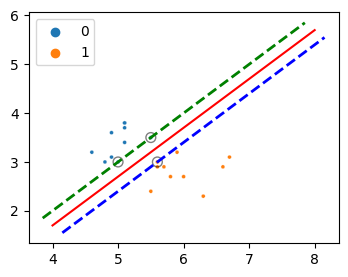

In [ ]:
from sklearn.svm import SVC
import seaborn as sns
svc_model = SVC(kernel='linear',C=10000000000,max_iter = 1000000000)
svc_model.fit(X_train, y_train)

plt.figure(figsize=(4, 3))
# Plotting our two-features-space
sns.scatterplot(x=X_train[:, 0],
                y=X_train[:, 1],
                hue=y_train,
                s=8);
# Constructing a hyperplane using a formula.
w = svc_model.coef_[0]           # w consists of 2 elements
b = svc_model.intercept_[0]      # b consists of 1 element
x_points = np.linspace(4, 8)    # generating x-points from 4 to 8
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');
# Encircle support vectors
plt.scatter(svc_model.support_vectors_[:, 0],
            svc_model.support_vectors_[:, 1],
            s=50,
            facecolors='none',
            edgecolors='k',
            alpha=.5);
# Step 2 (unit-vector):
w_hat = svc_model.coef_[0] / (np.sqrt(np.sum(svc_model.coef_[0] ** 2)))
# Step 3 (margin):
margin = 1 / np.sqrt(np.sum(svc_model.coef_[0] ** 2)) #calculate the value of half of margin
# Step 4 (calculate points of the margin lines):
decision_boundary_points = np.array(list(zip(x_points, y_points)))
points_of_line_above = decision_boundary_points + w_hat * margin
points_of_line_below = decision_boundary_points - w_hat * margin
# Plot margin lines
# Blue margin line above
plt.plot(points_of_line_above[:, 0],
         points_of_line_above[:, 1],
         'b--',
         linewidth=2)
# Green margin line below
plt.plot(points_of_line_below[:, 0],
         points_of_line_below[:, 1],
         'g--',
         linewidth=2)
# They are saddle points for the Lagrange multiplier for this linear SVM optimization problem.

real_margin = margin*2
print(real_margin)
print(svc_model.coef_[0])

Considering the Complementary Slackness, if a vector is a support vector, its dual variables are larger than zero. Then the primal constraint must be tight.
which means the vectors lie on the boundary are support vectors


In [ ]:
print(svc_model.coef_[0])

[ 3.33266363 -3.33342658]


[ 3.33266363 -3.33342658]
0.42430075463962574
-7.662778452658107


1.0

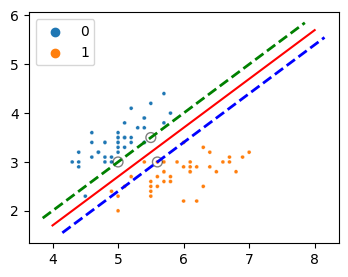

In [ ]:
from sklearn.svm import SVC
import seaborn as sns

plt.figure(figsize=(4, 3))
# Plotting our two-features-space
sns.scatterplot(x=X_test[:, 0],
                y=X_test[:, 1],
                hue=y_test,
                s=8);
# Constructing a hyperplane using a formula.
w = svc_model.coef_[0]           # w consists of 2 elements
b = svc_model.intercept_[0]      # b consists of 1 element
x_points = np.linspace(4, 8)    # generating x-points from 4 to 8
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');
# Encircle support vectors
plt.scatter(svc_model.support_vectors_[:, 0],
            svc_model.support_vectors_[:, 1],
            s=50,
            facecolors='none',
            edgecolors='k',
            alpha=.5);
# Step 2 (unit-vector):
w_hat = svc_model.coef_[0] / (np.sqrt(np.sum(svc_model.coef_[0] ** 2)))
# Step 3 (margin):
margin = 1 / np.sqrt(np.sum(svc_model.coef_[0] ** 2))
# Step 4 (calculate points of the margin lines):
decision_boundary_points = np.array(list(zip(x_points, y_points)))
points_of_line_above = decision_boundary_points + w_hat * margin
points_of_line_below = decision_boundary_points - w_hat * margin
# Plot margin lines
# Blue margin line above
plt.plot(points_of_line_above[:, 0],
         points_of_line_above[:, 1],
         'b--',
         linewidth=2)
# Green margin line below
plt.plot(points_of_line_below[:, 0],
         points_of_line_below[:, 1],
         'g--',
         linewidth=2)



w = svc_model.coef_[0]
print(w)
print(2*margin)
print(b)
svc_model.score(X_test,y_test)



In [ ]:
print(w)
print(-b/w[1])
'''They do not have the same decision boundary."

[ 3.33266363 -3.33342658]
-2.298769231324805


In [ ]:
svc_model.score(X_train, y_train)

1.0

In [ ]:
svc_model.score(X_test,y_test)

1.0

0.24318318953945936
[ 6.31804679 -5.26503723]
-17.32197688065553


1.0

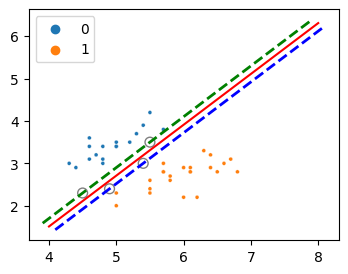

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(dsX, dsy, test_size=0.4, random_state=0)
from sklearn.svm import SVC
import seaborn as sns
svc_model2 = SVC(kernel='linear',C=10000000000,max_iter = 100000000)
svc_model2.fit(X_train2, y_train2)

plt.figure(figsize=(4, 3))
# Plotting our two-features-space
sns.scatterplot(x=X_test2[:, 0],
                y=X_test2[:, 1],
                hue=y_test2,
                s=8);
# Constructing a hyperplane using a formula.
w = svc_model2.coef_[0]           # w consists of 2 elements
b = svc_model2.intercept_[0]      # b consists of 1 element
x_points = np.linspace(4, 8)    # generating x-points from 4 to 8
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');
# Encircle support vectors
plt.scatter(svc_model2.support_vectors_[:, 0],
            svc_model2.support_vectors_[:, 1],
            s=50,
            facecolors='none',
            edgecolors='k',
            alpha=.5);
# Step 2 (unit-vector):
w_hat = svc_model2.coef_[0] / (np.sqrt(np.sum(svc_model2.coef_[0] ** 2)))
# Step 3 (margin):
margin = 1 / np.sqrt(np.sum(svc_model2.coef_[0] ** 2))
# Step 4 (calculate points of the margin lines):
decision_boundary_points = np.array(list(zip(x_points, y_points)))
points_of_line_above = decision_boundary_points + w_hat * margin
points_of_line_below = decision_boundary_points - w_hat * margin
# Plot margin lines
# Blue margin line above
plt.plot(points_of_line_above[:, 0],
         points_of_line_above[:, 1],
         'b--',
         linewidth=2)
# Green margin line below
plt.plot(points_of_line_below[:, 0],
         points_of_line_below[:, 1],
         'g--',
         linewidth=2)

print(2*margin)
print(svc_model2.coef_[0])
print(b)
''' The decision boundary changes, the margin, w and b all changed. The test accuracy did not change,
being 1.0. We are including more datapoints when traning. Some points which were support vectors now
are not identified as support vectors. New points introduced with larger training set can be identified
as support vectors now. The test accuracy did not change because even though the last model was "poorly"
trained compared to this one. They can still do a good job in predicting the test datapoints despite that
some of test points lie in between the margins,'''
svc_model2.score(X_test2,y_test2)


In [ ]:
svc_model2.score(X_test2,y_test2)

1.0

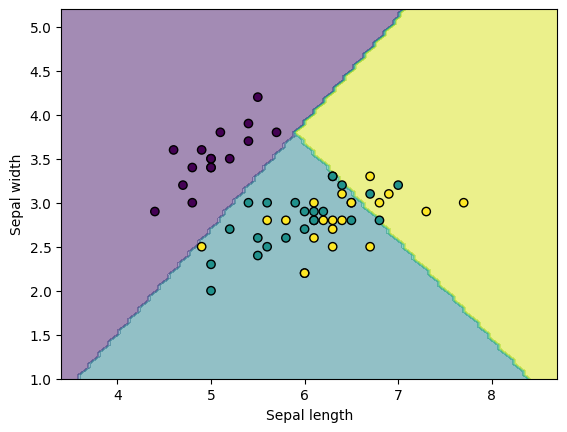

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
svc_model_ovo = SVC(kernel='rbf',C=100000000,max_iter=1000000)
ovo = OneVsOneClassifier(svc_model)
dsXtotal = X[:,:2]
dsytotal = y
X_traintotal, X_testtotal, y_traintotal, y_testtotal = train_test_split(dsXtotal, dsytotal, test_size=0.4, random_state=0)

ovo.fit(X_traintotal,y_traintotal)

disp = DecisionBoundaryDisplay.from_estimator(ovo, X_testtotal, response_method="predict",xlabel='Sepal length', ylabel='Sepal width',alpha=0.5)
disp.ax_.scatter(X_testtotal[:, 0], X_testtotal[:, 1], c=y_testtotal, edgecolor="k")
plt.show()

# We train the multiclass SVM classifier using the method of traing 3 one to one binary SVM classifier
# We determine its final prediction by all three SVM votes

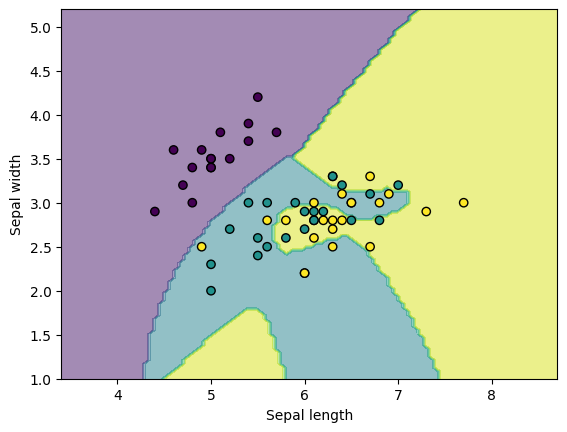

' Instead of training SVM with linear models, we can use kernels other than linear kernels.\nIt is feasible because as long as the inner product between training datapoints are well defined, we can use the kernels.\nThe reason why we choose rbf kernels is that it shows the property of universal approximation.\nGiven sufficient numbers of support vectors, it is capable of approximate any continuous function.'

In [ ]:
X_traintotal, X_testtotal, y_traintotal, y_testtotal = train_test_split(dsXtotal, dsytotal, test_size=0.4, random_state=0)
from sklearn.svm import SVC
import seaborn as sns
svc_modelmul = SVC(kernel='rbf',C=10000000000,max_iter = 1000000000)
svc_modelmul.fit(X_traintotal, y_traintotal)

disp = DecisionBoundaryDisplay.from_estimator(svc_modelmul, X_testtotal, response_method="predict",xlabel='Sepal length', ylabel='Sepal width',alpha=0.5)
disp.ax_.scatter(X_testtotal[:, 0], X_testtotal[:, 1], c=y_testtotal, edgecolor="k")
plt.show()

# Instead of training SVM with linear models, we can use kernels other than linear kernels.
# It is feasible because as long as the inner product between training datapoints are well defined, we can use the kernels.
# The reason why we choose rbf kernels is that it shows the property of universal approximation.
# Given sufficient numbers of support vectors, it is capable of approximate any continuous function.